## Jesus Rodrigo Colina Nunez
## Student Number 2017156
## MSC_DA_CA2

In [2]:
#pip install plotly # Here we are installing plotly in case we do not have it

In [99]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import mannwhitneyu

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import norm



from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [132]:
#!pip install xlrd 

#In order to read xlrd files

#!pip install scikit-learn

#!pip install dash dash-core-components dash-html-components plotly  #Dash

In [4]:
# Load Files

df_DublinLuas = pd.read_csv('LuasPassengerNumbers.csv') 

df_DublinLuas1 = pd.read_csv('PassengerJourneysbyLuas.csv') 

# Read an excel file
df_SubteBA1 = pd.read_excel('SubteBuenosAires.xlsx')
 




#### EDA - Dublin Luas data sets 

In [5]:
df_DublinLuas.head(100)  #We have a look of the first 100 rows

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553
...,...,...,...,...,...,...,...,...
95,TOA11C02,Green line,2020,2020,05,May,Number,152570
96,TOA11C02,Green line,2020,2020,06,June,Number,350566
97,TOA11C02,Green line,2020,2020,07,July,Number,620358
98,TOA11C02,Green line,2020,2020,08,August,Number,698594


In [6]:
df_DublinLuas1.head(100) #We have a look of the first 100 rows

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0
...,...,...,...,...,...,...,...,...
95,TII03C01,Passenger Journeys,2019W32,2019 Week 32,2,Green line,Number,384389.0
96,TII03C01,Passenger Journeys,2019W33,2019 Week 33,-,All Luas lines,Number,868677.0
97,TII03C01,Passenger Journeys,2019W33,2019 Week 33,1,Red line,Number,445915.0
98,TII03C01,Passenger Journeys,2019W33,2019 Week 33,2,Green line,Number,422762.0


In [7]:
# Basic Information
#Here we check the size of the dataset How many columns and rows

#LuasPassengerNumbers

basic_info_1 = df_DublinLuas.info()


#This dataset has 195 entries and 8 columns. There are no missing values.

# Descriptive Statistics
desc_stats_1 = df_DublinLuas.describe()


# Missing values
missing_values_1 = df_DublinLuas.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        195 non-null    object
 1   Statistic Label  195 non-null    object
 2   TLIST(A1)        195 non-null    int64 
 3   Year             195 non-null    int64 
 4   C01885V02316     195 non-null    object
 5   Month            195 non-null    object
 6   UNIT             195 non-null    object
 7   VALUE            195 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.3+ KB


In [8]:
# PassengerJourneysbyLuas


basic_info_2 = df_DublinLuas1.info()

#This dataset has 780 rows and 8 columns. There are 9 missing values in the 'VALUE' column.

desc_stats_2 = df_DublinLuas1.describe()

missing_values_2 = df_DublinLuas1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        780 non-null    object 
 1   Statistic Label  780 non-null    object 
 2   TLIST(W1)        780 non-null    object 
 3   Week             780 non-null    object 
 4   C03132V03784     780 non-null    object 
 5   Luas Line        780 non-null    object 
 6   UNIT             780 non-null    object 
 7   VALUE            771 non-null    float64
dtypes: float64(1), object(7)
memory usage: 48.9+ KB


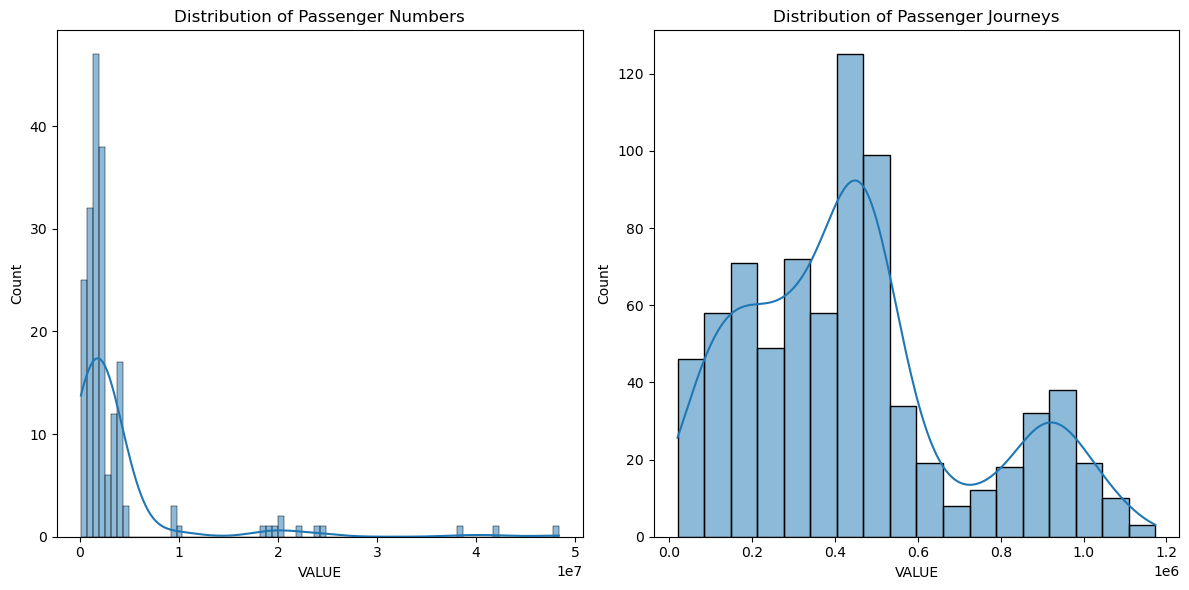

In [9]:

# I focus on 'VALUE' column for both datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_DublinLuas['VALUE'], kde=True)
plt.title('Distribution of Passenger Numbers')

plt.subplot(1, 2, 2)
sns.histplot(df_DublinLuas1['VALUE'], kde=True)
plt.title('Distribution of Passenger Journeys')

plt.tight_layout()
plt.show()


#Data Distribution: 
#The distribution of passenger journeys is skewed, indicating that some weeks have significantly higher or lower passenger counts than others.

### EDA - Data set Subway Buenos Aires Argentina 

In [10]:


df_SubteBA1.head(20)




,MES,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro
0,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Enero,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0
2,Febrero,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0
3,Marzo,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0
4,Abril,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0
5,Mayo,24577749,4254514.0,6887118.0,4758640.0,6437735.0,1836516.0,312436.0,90790.0
6,Junio,25613877,4435151.0,7396539.0,4974413.0,6505335.0,1871141.0,337630.0,93668.0
7,Julio,26056344,4460665.0,7683479.0,5014360.0,6708541.0,1757642.0,341509.0,90148.0
8,Agosto,27317442,4637966.0,7881651.0,5166576.0,7208916.0,1979066.0,353430.0,89837.0
9,Septiembre,27900595,4603717.0,8101275.0,5317462.0,7392462.0,2031498.0,362235.0,91946.0


The structure of this Excel file is not that bad but the columns need some rearrangement for clarity. .

So to start I will clean up the data by removing unnecessary rows and setting appropriate column headers. then I will sort the data by year and month. 



We also noticed that the names are in spanish, I will changed them to english but at a later steps. 



In [11]:
# Here I separeted the column Mes and Año because they were in the same column

df_SubteBA1['Año'] = df_SubteBA1['MES'].apply(lambda x: x if isinstance(x, int) else None)
df_SubteBA1['Mes'] = df_SubteBA1['MES'].apply(lambda x: x if isinstance(x, str) else None)

# Here I fill the year values that were mising 
df_SubteBA1['Año'].fillna(method='ffill', inplace=True)

df_SubteBA1.drop('MES', axis=1, inplace=True)

# Here we have and Idea of how our data set look like
df_SubteBA1.head()

,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro,Año,Mes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,None
1,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0,2010.0,Enero
2,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0,2010.0,Febrero
3,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0,2010.0,Marzo
4,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0,2010.0,Abril


In [12]:
# We delete all the rows where the colum Mes is None 
df_SubteBA1 = df_SubteBA1.dropna(subset=['Mes'])

# Here we show our data set how it looks like
df_SubteBA1.head()

,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro,Año,Mes
1,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0,2010.0,Enero
2,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0,2010.0,Febrero
3,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0,2010.0,Marzo
4,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0,2010.0,Abril
5,24577749,4254514.0,6887118.0,4758640.0,6437735.0,1836516.0,312436.0,90790.0,2010.0,Mayo


In [13]:
# Rearange the clumn names 
new_column_order = ['Año', 'Mes', 'TOTAL', 'LINEA A', 'LINEA B', 'LINEA C', 'LINEA D', 'LINEA E', 'LINEA H', 'Pemetro']
df_SubteBA1 = df_SubteBA1[new_column_order]

# Here we see how it looks like
df_SubteBA1.head()

,Año,Mes,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro
1,2010.0,Enero,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0
2,2010.0,Febrero,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0
3,2010.0,Marzo,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0
4,2010.0,Abril,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0
5,2010.0,Mayo,24577749,4254514.0,6887118.0,4758640.0,6437735.0,1836516.0,312436.0,90790.0


In [14]:
df_SubteBA1.info

# 166 rows x 10 columns

<bound method DataFrame.info of         Año         Mes     TOTAL    LINEA A    LINEA B    LINEA C    LINEA D  \
1    2010.0       Enero  18400465  3221968.0  5429265.0  3869637.0  4239486.0   
2    2010.0     Febrero  19063147  3335755.0  5547937.0  3776980.0  4736295.0   
3    2010.0       Marzo  25439123  4467167.0  7318728.0  4735548.0  6664063.0   
4    2010.0       Abril  24538311  4371793.0  6907448.0  4662661.0  6429258.0   
5    2010.0        Mayo  24577749  4254514.0  6887118.0  4758640.0  6437735.0   
..      ...         ...       ...        ...        ...        ...        ...   
175  2023.0       Junio  19480456  3611442.0  4818834.0  2719364.0  4624912.0   
176  2023.0       Julio  20353351  3818226.0  5041549.0  3098744.0  4680619.0   
177  2023.0      Agosto  21279617  3926598.0  5131106.0  3154456.0  4942118.0   
178  2023.0  Septiembre  21402837  3927178.0  5101320.0  3196849.0  4897334.0   
179  2023.0     Octubre  21312142  3917304.0  5073359.0  3197544.0  4868232.0

In [15]:
df_SubteBA1.dtypes

#We see the data types and we noticed that year and month need to be changed

Año        float64
Mes         object
TOTAL       object
LINEA A    float64
LINEA B    float64
LINEA C    float64
LINEA D    float64
LINEA E    float64
LINEA H    float64
Pemetro    float64
dtype: object

In [16]:
# Here I changed the colum year to integer and month to string
df_SubteBA1['Año'] = df_SubteBA1['Año'].astype(int)
df_SubteBA1['Mes'] = df_SubteBA1['Mes'].astype(str)



In [17]:
# Verify 
df_SubteBA1.dtypes

Año          int32
Mes         object
TOTAL       object
LINEA A    float64
LINEA B    float64
LINEA C    float64
LINEA D    float64
LINEA E    float64
LINEA H    float64
Pemetro    float64
dtype: object

In [18]:
df_SubteBA1.head()

,Año,Mes,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro
1,2010,Enero,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0
2,2010,Febrero,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0
3,2010,Marzo,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0
4,2010,Abril,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0
5,2010,Mayo,24577749,4254514.0,6887118.0,4758640.0,6437735.0,1836516.0,312436.0,90790.0


In [19]:
# we save the changes to a new file in case we mesed up so we have copies of both files.

#output_file_path = 'C:/Users/AW/Desktop/CA2/SubteBuenosAires2.xlsx'

# save my modified dataset
#df_SubteBA1.to_excel(output_file_path, index=False)

In [20]:
df_SubteBA2 = pd.read_excel('SubteBuenosAires2.xlsx')

In [21]:
df_SubteBA2.head()

,Año,Mes,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro
0,2010,Enero,18400465,3221968,5429265,3869637,4239486,1299757,255146,85206
1,2010,Febrero,19063147,3335755,5547937,3776980,4736295,1349138,243586,73456
2,2010,Marzo,25439123,4467167,7318728,4735548,6664063,1859415,316007,78195
3,2010,Abril,24538311,4371793,6907448,4662661,6429258,1791520,301660,73971
4,2010,Mayo,24577749,4254514,6887118,4758640,6437735,1836516,312436,90790


In [22]:
#Im going to change the names in English for better manipulation.

# Translate column names and month names to English
columns_translation = {
    "Año": "Year",
    "Mes": "Month",
    "TOTAL": "Total",
    "LINEA A": "Line A",
    "LINEA B": "Line B",
    "LINEA C": "Line C",
    "LINEA D": "Line D",
    "LINEA E": "Line E",
    "LINEA H": "Line H",
    "Pemetro": "Perimeter"
}

# Changing Spanish month names to English
months_translation = {
    "Enero": "January",
    "Febrero": "February",
    "Marzo": "March",
    "Abril": "April",
    "Mayo": "May",
    "Junio": "June",
    "Julio": "July",
    "Agosto": "August",
    "Septiembre": "September",
    "Octubre": "October",
    "Noviembre": "November",
    "Diciembre": "December"
}

# Apply the translations
df_SubteBA2.rename(columns=columns_translation, inplace=True)
df_SubteBA2["Month"] = df_SubteBA2["Month"].map(months_translation)


# Display the translated columns
df_SubteBA2.head(10)

,Year,Month,Total,Line A,Line B,Line C,Line D,Line E,Line H,Perimeter
0,2010,January,18400465,3221968,5429265,3869637,4239486,1299757,255146,85206
1,2010,February,19063147,3335755,5547937,3776980,4736295,1349138,243586,73456
2,2010,March,25439123,4467167,7318728,4735548,6664063,1859415,316007,78195
3,2010,April,24538311,4371793,6907448,4662661,6429258,1791520,301660,73971
4,2010,May,24577749,4254514,6887118,4758640,6437735,1836516,312436,90790
5,2010,June,25613877,4435151,7396539,4974413,6505335,1871141,337630,93668
6,2010,July,26056344,4460665,7683479,5014360,6708541,1757642,341509,90148
7,2010,August,27317442,4637966,7881651,5166576,7208916,1979066,353430,89837
8,2010,September,27900595,4603717,8101275,5317462,7392462,2031498,362235,91946
9,2010,October,24479060,4211089,6768838,4749099,6530144,1797830,330977,91083


In [23]:
#Here we have an overview of the Dataset Buenos Aires Subway

data_overview = {
    "Number of Rows": df_SubteBA2.shape[0],
    "Number of Columns": df_SubteBA2.shape[1],
    "Column Names": df_SubteBA2.columns.tolist(),
    "Data Types": df_SubteBA2.dtypes.to_dict(),
    "Missing Values": df_SubteBA2.isnull().sum().to_dict()
}


In [24]:
# Display the overview
data_overview

{'Number of Rows': 166,
 'Number of Columns': 10,
 'Column Names': ['Year',
  'Month',
  'Total',
  'Line A',
  'Line B',
  'Line C',
  'Line D',
  'Line E',
  'Line H',
  'Perimeter'],
 'Data Types': {'Year': dtype('int64'),
  'Month': dtype('O'),
  'Total': dtype('O'),
  'Line A': dtype('int64'),
  'Line B': dtype('int64'),
  'Line C': dtype('int64'),
  'Line D': dtype('int64'),
  'Line E': dtype('int64'),
  'Line H': dtype('int64'),
  'Perimeter': dtype('int64')},
 'Missing Values': {'Year': 0,
  'Month': 0,
  'Total': 0,
  'Line A': 0,
  'Line B': 0,
  'Line C': 0,
  'Line D': 0,
  'Line E': 0,
  'Line H': 0,
  'Perimeter': 0}}

In [25]:
# Convert 'Total' column to numeric
#setting errors='coerce' will convert non-numeric values to NaN
df_SubteBA2['Total'] = pd.to_numeric(df_SubteBA2['Total'], errors='coerce')

# Check for any new missing values in 'Total' after conversion
missing_values_total = df_SubteBA2['Total'].isnull().sum()

# Display the number of missing values in 'Total' 
missing_values_total

2

#### We see that we have 2 missing values in the column "Total", I will replace those missing values with the median, it would be better option rather than removing both rows, because we would be missing two months. 

In [26]:
# Impute missing values in 'Total' with the median
median_total = df_SubteBA2['Total'].median()
df_SubteBA2['Total'].fillna(median_total, inplace=True)

# Re-check for any missing values after imputation
missing_values_after_imputation = df_SubteBA2['Total'].isnull().sum()

# Display the number of missing values after imputation and the first few rows to verify the changes
missing_values_after_imputation

#We sucssesfully manage to replace the missing values with the median

0

## Descriptive statistics and appropriate visualisations 

In [27]:
#Descriptive Statistics
# Calculating basic descriptive statistics for numerical columns
desc_stats = df_SubteBA2.describe()

df_SubteBA2.describe()

#Mean, std, min and max 

,Year,Total,Line A,Line B,Line C,Line D,Line E,Line H,Perimeter
count,166.000000,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,166.000000
mean,2016.421687,2.105520e+07,3.718372e+06,5.723270e+06,3.418446e+06,5.290621e+06,1.486000e+06,1.268865e+06,65347.307229
std,4.003394,7.448480e+06,1.377890e+06,2.072070e+06,1.292896e+06,1.989369e+06,5.300753e+05,8.988333e+05,32081.686158
min,2010.000000,7.946580e+05,2.700000e+01,1.754040e+05,1.688150e+05,1.575810e+05,5.667100e+04,1.048690e+05,9526.000000
25%,2013.000000,1.833339e+07,3.328825e+06,4.989864e+06,2.898469e+06,4.505809e+06,1.280190e+06,5.198342e+05,29861.250000
50%,2016.000000,2.200137e+07,3.939730e+06,6.259280e+06,3.696090e+06,5.837420e+06,1.620504e+06,8.068750e+05,70857.000000
75%,2020.000000,2.612660e+07,4.690496e+06,7.275554e+06,4.364732e+06,6.750331e+06,1.856405e+06,2.126144e+06,91036.500000
max,2023.000000,3.276228e+07,5.692707e+06,8.686526e+06,5.317462e+06,8.119842e+06,2.270711e+06,3.159695e+06,158159.000000


The 'Total' column, representing total ridership, has a mean of approximately 21 million, with a standard deviation of 7.4 million. This indicates significant variability in total ridership over time.


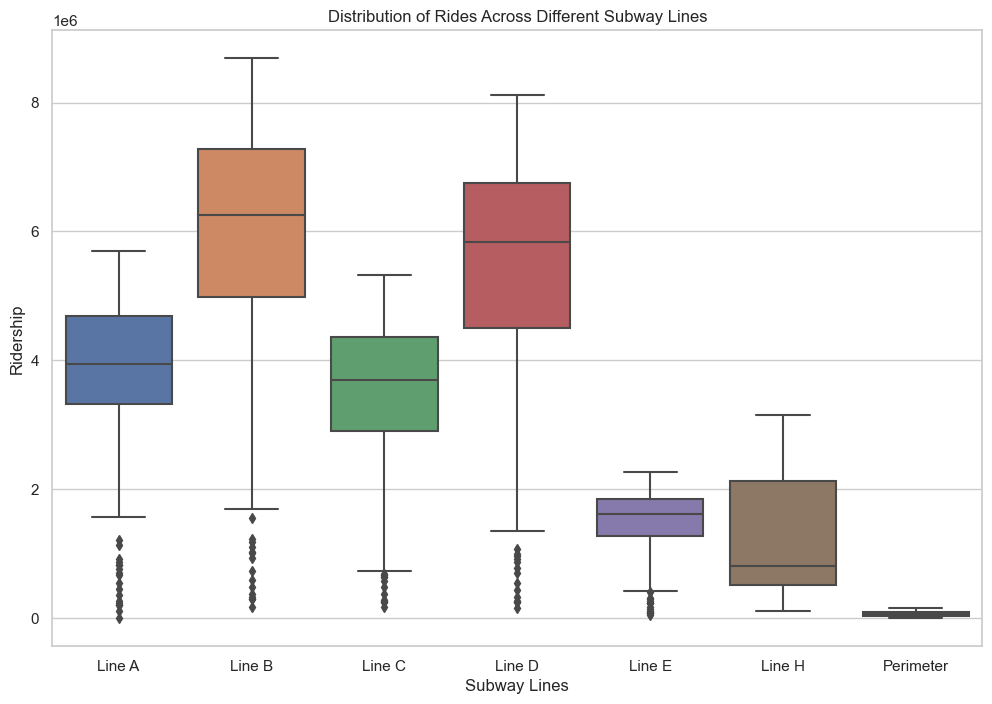

In [28]:

sns.set(style="whitegrid")

# Individual Variable Analysis: Distribution of Rides Across Different Lines
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_SubteBA2[['Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line H', 'Perimeter']])
plt.title('Distribution of Rides Across Different Subway Lines')
plt.ylabel('Ridership')
plt.xlabel('Subway Lines')
plt.show()



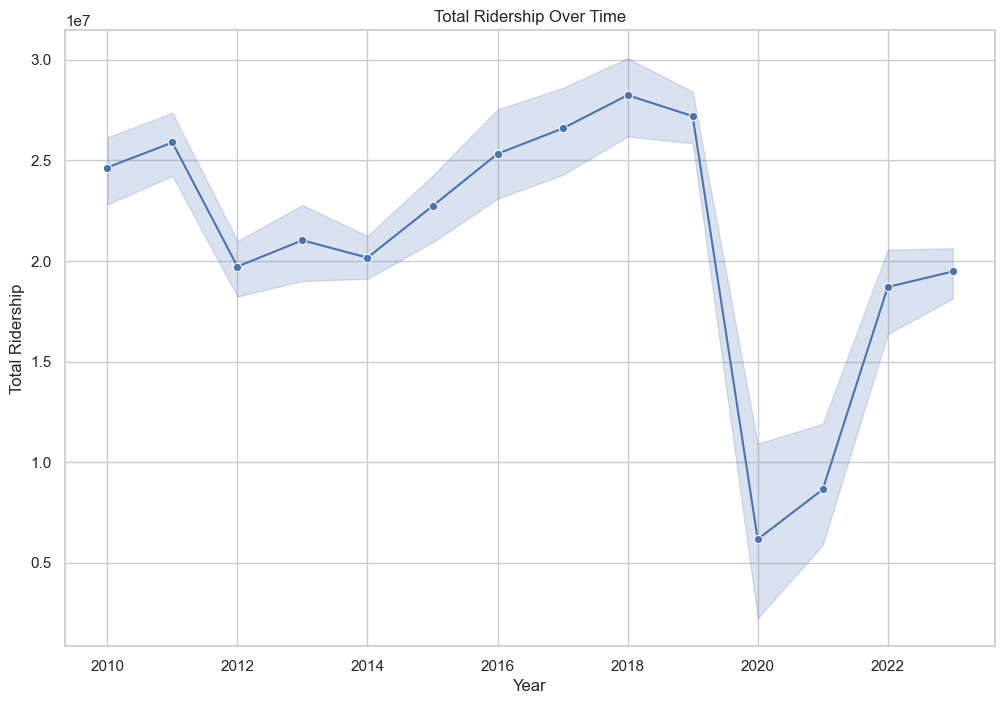

In [29]:
# Time Series Analysis: Total Ridership over the years 2010 - 2023
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Total', data=df_SubteBA2, marker='o')
plt.title('Total Ridership Over Time')
plt.ylabel('Total Ridership')
plt.xlabel('Year')
plt.show()

#### Further Time Series Analysis: Here I do a more detailed analysis on a monthly basis would be insightful

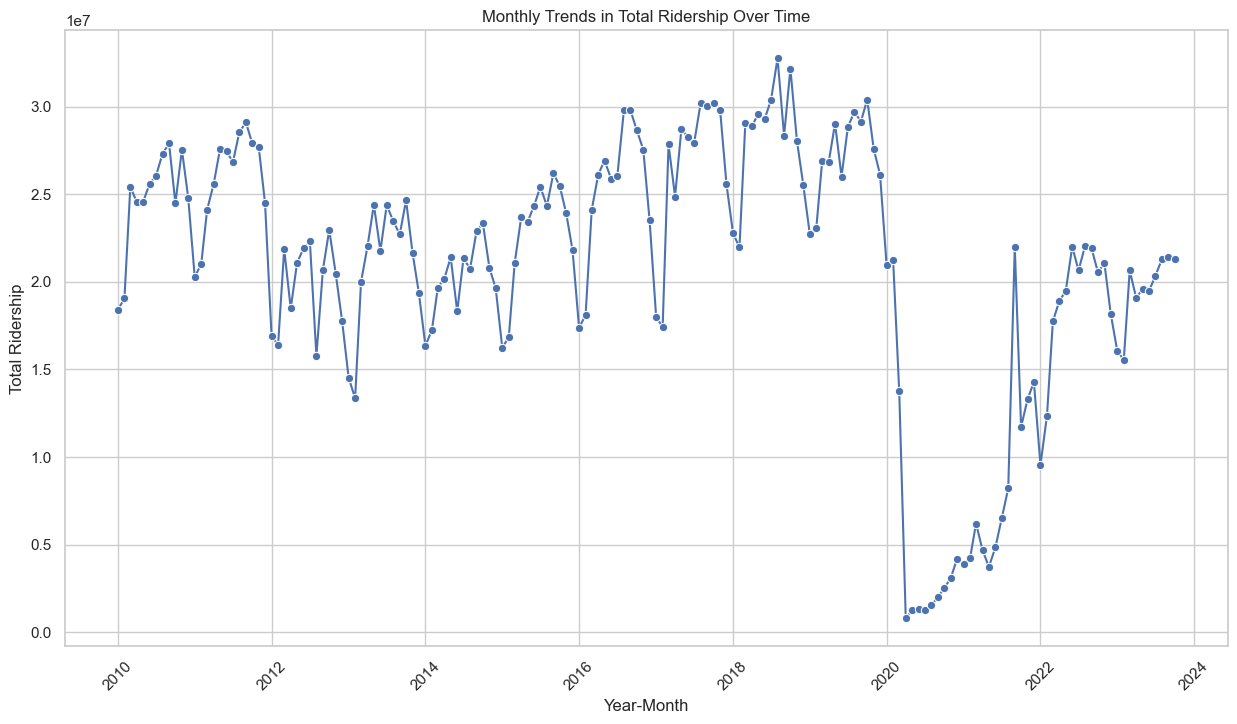

In [30]:
# Here I created a combined year/month column 
df_SubteBA2['YearMonth'] = df_SubteBA2['Year'].astype(str) + '-' + df_SubteBA2['Month']
df_SubteBA2['YearMonth'] = pd.to_datetime(df_SubteBA2['YearMonth'], format='%Y-%B')

# Time Series Analysis: Monthly Trends in Total
plt.figure(figsize=(15, 8))
sns.lineplot(x='YearMonth', y='Total', data=df_SubteBA2, marker='o')
plt.title('Monthly Trends in Total Ridership Over Time')
plt.xticks(rotation=45)
plt.ylabel('Total Ridership')
plt.xlabel('Year-Month')
plt.show()


Time Series Analysis: Monthly Trends in Total 
The line plot shows the monthly trends in total  over time:

There are noticeable fluctuations within each year, suggesting a potential seasonal pattern in ridership.
Some years show significant peaks or troughs, which could be due to various external factors for example (events, weather conditions, operational changes and the most importat in 2020 we see it goes down because of COVID and slowling increasing).

The trend over the entire period can be better understood by observing changes in peak and trough levels across different years.

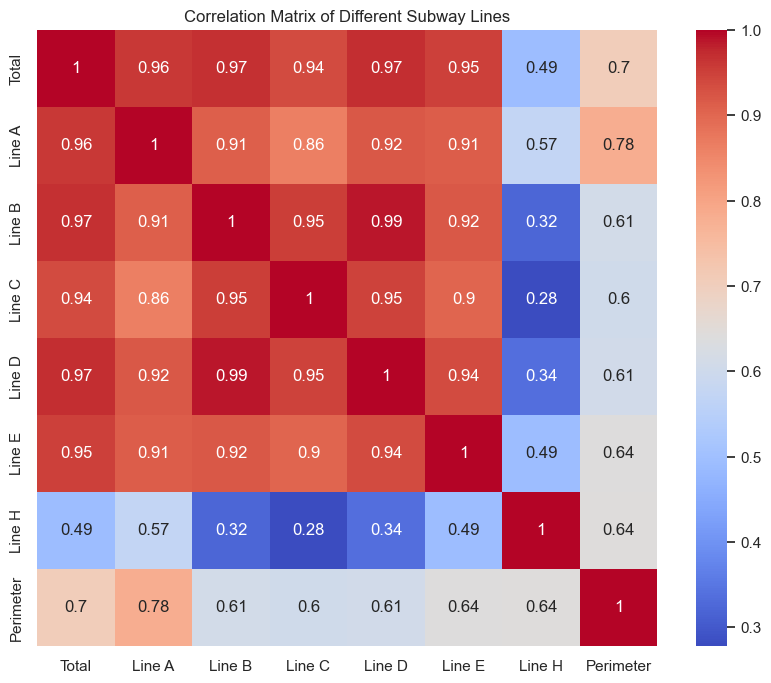

In [31]:
# Correlation Analysis: Correlation between different lines
correlation_matrix = df_SubteBA2[['Total', 'Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line H', 'Perimeter']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Different Subway Lines')
plt.show()

The heatmap presents the correlation matrix of different subway lines and total ridership:

There is a strong positive correlation between the ridership of different lines, indicating that when one line experiences high ridership, others tend to as well.
The 'Total' ridership is highly correlated with each individual line, showing that the total ridership is a good representation of the overall system usage.
Some lines have stronger correlations with each other, suggesting they might serve interconnected or similarly trafficked areas.

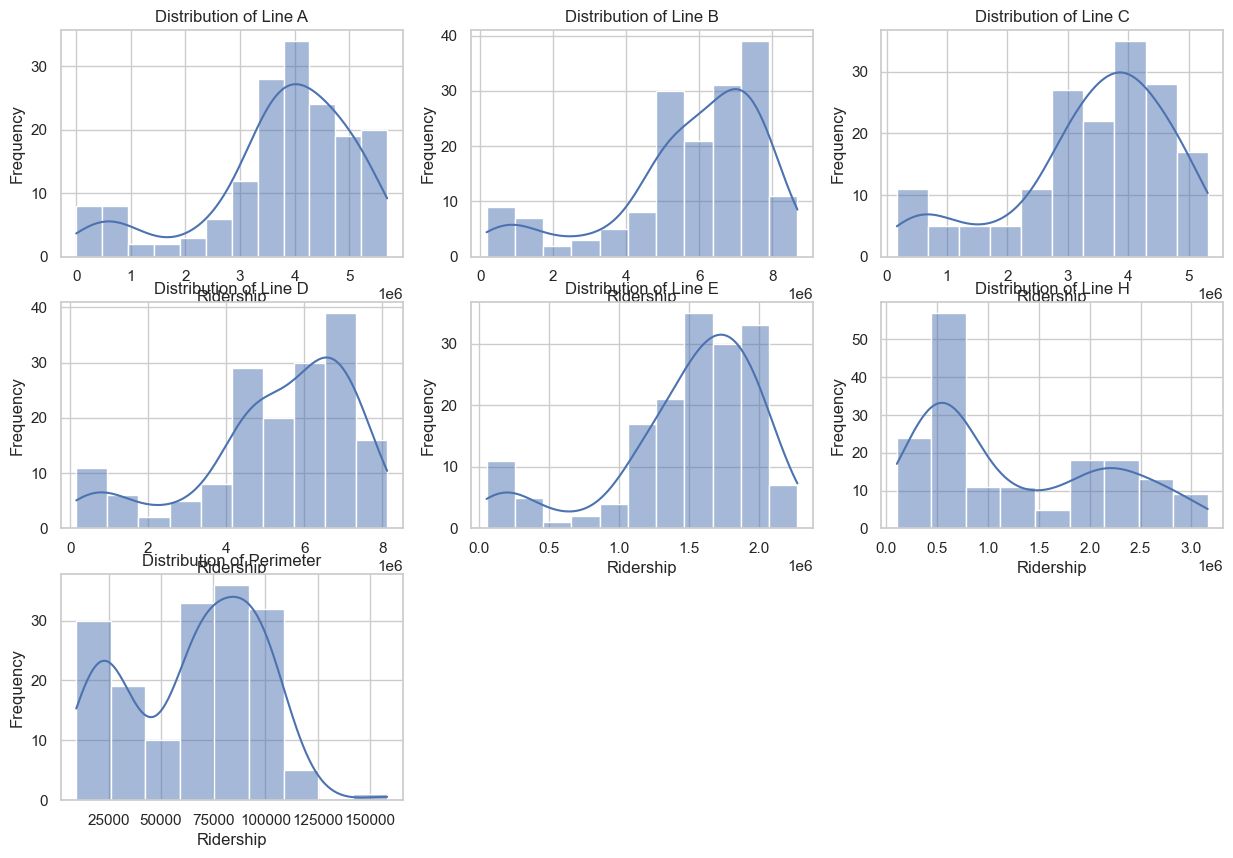

In [32]:
# Histograms for ridership of each line
# Helps to understand the distribution of ridership across different lines
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line H', 'Perimeter'], start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df_SubteBA2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Ridership')
    plt.ylabel('Frequency')


Histograms for Each Line:

These histograms show the distribution of ridership for each subway line.
We observe different patterns in ridership across lines, indicating varying usage intensities and possibly different user demographics or purposes

### Confidence interval Subway Buenos Aires

In [33]:
from scipy import stats


# Function to calculate confidence interval for each year
def calculate_yearly_confidence_interval(data, column):
    yearly_data = {}
    for year in data['Year'].unique():
        year_data = data[data['Year'] == year][column]
        mean = np.mean(year_data)
        std_error = stats.sem(year_data)
        confidence_interval = stats.t.interval(0.95, len(year_data) - 1, loc=mean, scale=std_error) #I could aloso used the monthly data
        yearly_data[year] = (mean, confidence_interval)
    return yearly_data

# Calculating mean and confidence interval for each line per year
lines = ['Total','Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line H', 'Perimeter']
yearly_ci_results = {line: calculate_yearly_confidence_interval(df_SubteBA2, line) for line in lines}

# Displaying the first line's results as an example 
# I can also display each line as well this is just an example 

yearly_ci_results['Total']



#Reference the code

# https://notebook.community/quantopian/research_public/notebooks/lectures/Confidence_Intervals/notebook
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

{2010: (24644790.083333332, (22729527.0089183, 26560053.157748364)),
 2011: (25888993.416666668, (24058814.25507358, 27719172.578259755)),
 2012: (19720710.416666668, (18119489.875641365, 21321930.95769197)),
 2013: (21025908.916666668, (18667959.50355647, 23383858.329776864)),
 2014: (20163840.166666668, (18832913.83393157, 21494766.499401767)),
 2015: (22726934.166666668, (20671040.97476638, 24782827.358566955)),
 2016: (25328661.166666668, (22757158.794566788, 27900163.538766548)),
 2017: (26584678.666666668, (23734433.51666491, 29434923.816668425)),
 2018: (28241939.0, (26135417.639385294, 30348460.360614706)),
 2019: (27199469.833333332, (25638920.93227301, 28760018.734393653)),
 2020: (6164766.166666667, (1205517.4365157187, 11124014.896817615)),
 2021: (8639109.375, (5065208.769276945, 12213009.980723055)),
 2022: (18703973.958333332, (16198268.287773594, 21209679.62889307)),
 2023: (19475800.5, (17970527.248120494, 20981073.751879506))}


These confidence intervals provide an estimated range for the true average ridership of the TOTAL for each year.(That means all the lines)
There is a significant drop in ridership in 2020, likely due to the global COVID 19 pandemic, and a partial recovery in the subsequent years.

Similar calculations can be made for other subway lines to compare trends.
Further analysis could explore the reasons behind the fluctuations in ridership, such as external events or changes in the subway system.
This analysis helps in understanding the variability and trends in ridership over different years, providing a more detailed perspective on how subway usage has evolved.

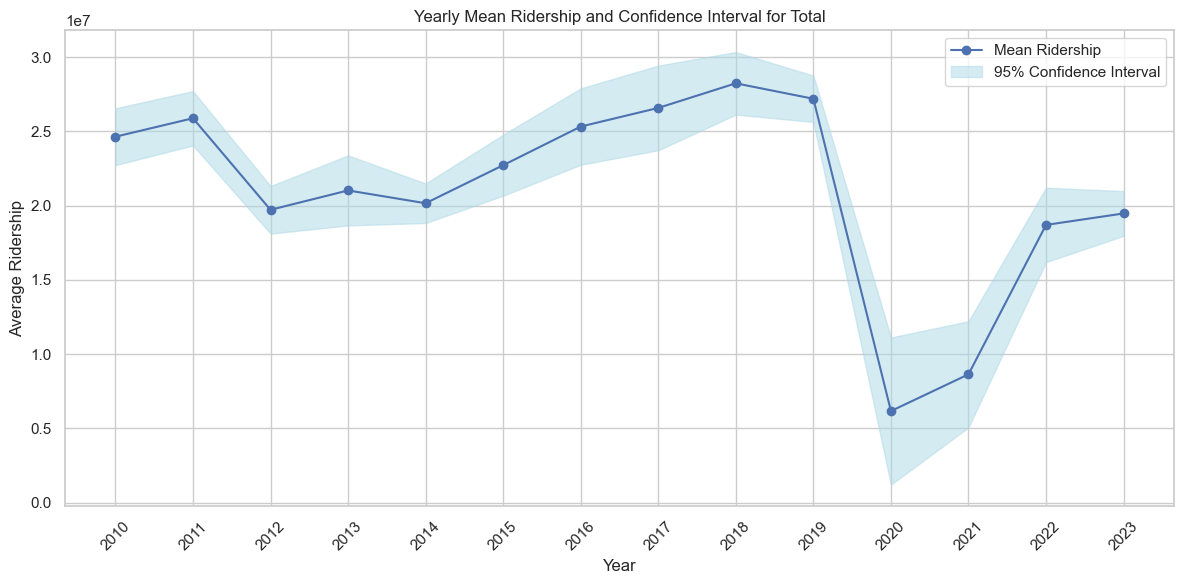

In [34]:
# Plotting the yearly confidence intervals for the total 
years = list(yearly_ci_results['Total'].keys())
means = [yearly_ci_results['Total'][year][0] for year in years]
ci_lower = [yearly_ci_results['Total'][year][1][0] for year in years]
ci_upper = [yearly_ci_results['Total'][year][1][1] for year in years]

plt.figure(figsize=(12, 6))
plt.plot(years, means, marker='o', color='b', label='Mean Ridership')
plt.fill_between(years, ci_lower, ci_upper, color='lightblue', alpha=0.5, label='95% Confidence Interval')
plt.title('Yearly Mean Ridership and Confidence Interval for Total')
plt.xlabel('Year')
plt.ylabel('Average Ridership')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


### Tests 

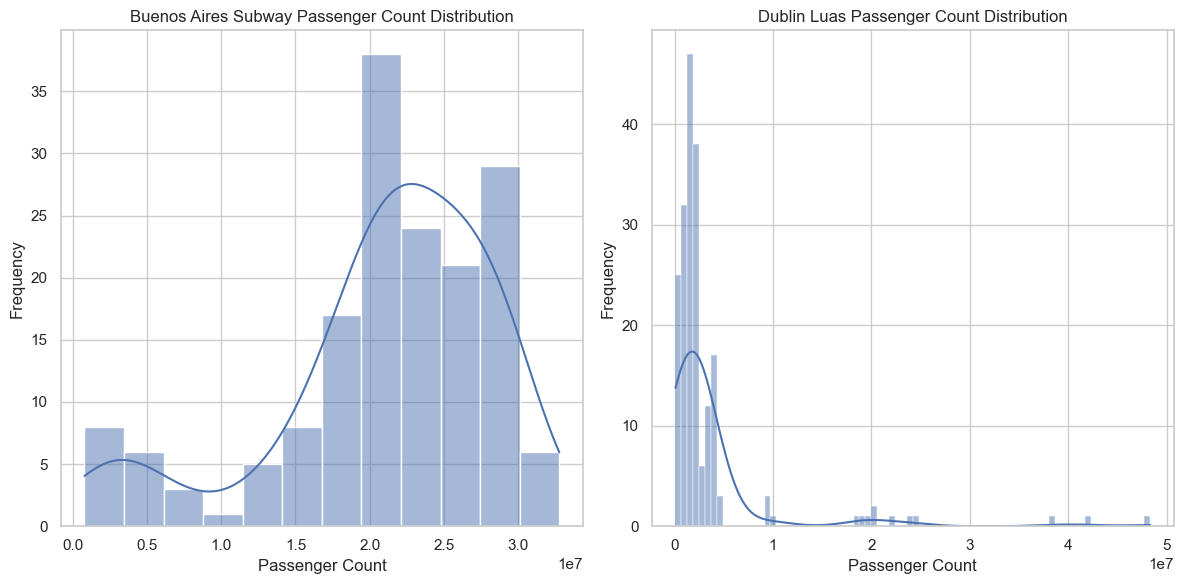

In [45]:
# Plotting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_SubteBA2['Total'], kde=True)
plt.title('Buenos Aires Subway Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_DublinLuas['VALUE'], kde=True)
plt.title('Dublin Luas Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

from scipy.stats import mannwhitneyu

In [115]:
#Here I have to make some Hupothesis for these examples.

In [36]:
#1
# One sample t-test

# My Hypothesis: The mean ridership in 2010 for Line A is different from 4 million.
line_a_2010 = df_SubteBA2[(df_SubteBA2['Year'] == 2010)]['Line A']
t_test_1_sample = stats.ttest_1samp(line_a_2010, 4000000)

t_test_1_sample

TtestResult(statistic=1.7182391137949133, pvalue=0.11373372786358518, df=11)

In [37]:
#2
# Paired t-test

# My Hypothesis: There is a significant difference in ridership between Line A and Line B in 2010.
line_b_2010 = df_SubteBA2[(df_SubteBA2['Year'] == 2010)]['Line B']
t_test_paired = stats.ttest_rel(line_a_2010, line_b_2010)

t_test_paired

TtestResult(statistic=-24.003477726797463, pvalue=7.487358411582701e-11, df=11)

In [38]:
#3
# Analysis of Variance (ANOVA)

# My Hypothesis: The mean ridership among Line A, Line B, and Line C are equal.
line_c_2010 = df_SubteBA2[(df_SubteBA2['Year'] == 2010)]['Line C']
anova_test = stats.f_oneway(line_a_2010, line_b_2010, line_c_2010)

anova_test


F_onewayResult(statistic=67.74099535523548, pvalue=2.0765744223551514e-12)

In [116]:
#4
# Wilcoxon test

# My Hypothesis: There is a significant difference in ridership between Line A and Line B in 2010


wilcoxon_test = stats.wilcoxon(line_a_2010, line_b_2010)

wilcoxon_test

WilcoxonResult(statistic=0.0, pvalue=0.00048828125)

In [117]:
#5
# Chi-squared test
# My Hypothesis: There is an asociation between 'Year' and 'Total' ridership.

contingency_table = pd.crosstab(df_SubteBA2['Year'], df_SubteBA2['Total'] > median_total)
chi_squared_test = stats.chi2_contingency(contingency_table)

chi_squared_test

Chi2ContingencyResult(statistic=95.98983739837398, pvalue=9.88617668647293e-15, dof=13, expected_freq=array([[6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [5.06024096, 4.93975904]]))

In [47]:
#6

# Here I used BOTH datasets 

# Conducting Mann-Whitney U test
# This test compares the distributions of two independent samples
# Null Hypothesis: The distributions of both samples are equal

# Applying the test
mwu_result = mannwhitneyu(df_SubteBA2['Total'].dropna(), df_DublinLuas['VALUE'].dropna())

mwu_result

MannwhitneyuResult(statistic=30471.0, pvalue=2.2840355705917693e-47)

In [44]:
# Identifying common years for both datasets
common_years = set(df_SubteBA2['Year']).intersection(set(df_DublinLuas['Year']))

# Mann-Whitney U test for each common year
mwu_results_yearly = {}

for year in common_years:
    data_ba = df_SubteBA2[df_SubteBA2['Year'] == year]['Total'].dropna()
    data_dublin = df_DublinLuas[df_DublinLuas['Year'] == year]['VALUE'].dropna()
    if len(data_ba) > 0 and len(data_dublin) > 0:
        mwu_result = mannwhitneyu(data_ba, data_dublin)
        mwu_results_yearly[year] = mwu_result

mwu_results_yearly

{2018: MannwhitneyuResult(statistic=456.0, pvalue=8.717420960680261e-07),
 2019: MannwhitneyuResult(statistic=452.0, pvalue=1.366997324017936e-06),
 2020: MannwhitneyuResult(statistic=375.0, pvalue=0.0018090505670050002),
 2021: MannwhitneyuResult(statistic=441.0, pvalue=4.529154004360368e-06),
 2022: MannwhitneyuResult(statistic=446.0, pvalue=2.64628250190483e-06)}

### Use of multiple models 

### Dublin Luas Dataset

In [50]:
#Imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [118]:
# Aggregating data to an annual basis
annual_passenger_counts = df_DublinLuas.groupby('Year')['VALUE'].sum().reset_index()

# Preparing the data
X = annual_passenger_counts[['Year']]
y = annual_passenger_counts['VALUE']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)  # Calculating MSE for Linear Regression

# KNN Model

knn_errors = []
neighbor_values = [1, 2, 3, 4]
for n in neighbor_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    knn_errors.append((n, mse_knn))

# Finding the best number of neighbors
best_n_neighbors = min(knn_errors, key=lambda x: x[1])[0]

# Creating a forecast for the next 5 years using both models
forecast_years = np.array([[year] for year in range(2023, 2028)])  # Forecasting for 2023 to 2027
lin_reg_forecast = lin_reg.predict(forecast_years)
knn_forecast = KNeighborsRegressor(n_neighbors=best_n_neighbors).fit(X, y).predict(forecast_years)

# Compiling the forecast results
forecast_results = pd.DataFrame({
    'Year': forecast_years.flatten(),
    'Linear Regression Forecast': lin_reg_forecast,
    'KNN Forecast': knn_forecast
})



In [125]:
# Displaying the forecast results and the MSE for Linear Regression
print(forecast_results)
print(f"Best number of neighbors for KNN: {best_n_neighbors}") #KNN DOES NOT work to forecast the next 5 years, we see we get the same Data
print(f"MSE for Linear Regression: {mse_lin_reg}")



   Year  Linear Regression Forecast  KNN Forecast
0  2023                9.823403e+07   116298386.5
1  2024                9.062378e+07   116298386.5
2  2025                8.301353e+07   116298386.5
3  2026                7.540328e+07   116298386.5
4  2027                6.779303e+07   116298386.5
Best number of neighbors for KNN: 2
MSE for Linear Regression: 4187888132112323.5


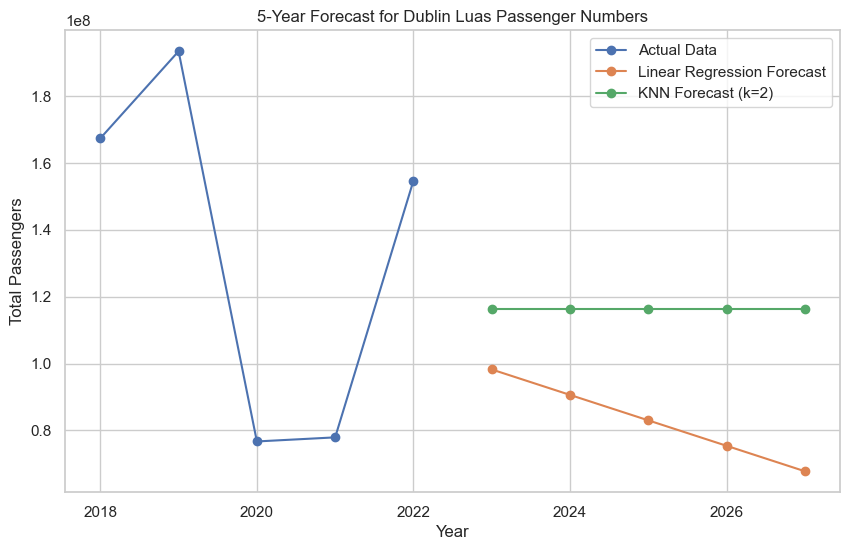

In [129]:
# Plotting the forecast results
plt.figure(figsize=(10, 6))
plt.plot(annual_passenger_counts['Year'], annual_passenger_counts['VALUE'], label='Actual Data', marker='o')
plt.plot(forecast_results['Year'], forecast_results['Linear Regression Forecast'], label='Linear Regression Forecast', marker='o')
plt.plot(forecast_results['Year'], forecast_results['KNN Forecast'], label=f'KNN Forecast (k={best_n_neighbors})', marker='o')
plt.title('5-Year Forecast for Dublin Luas Passenger Numbers')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.legend()
plt.grid(True)
plt.show()

### Buenos Aires Subway 

Here I wil use the same models but for the Buenos Aires Subway Data set.



In [92]:
# Calculating the Mean Squared Error (MSE) for both models

# Splitting the data into training and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the models on the training set
lin_reg_subte = LinearRegression().fit(X_train, y_train)
knn_subte = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

# Predicting on the test set
y_pred_lin_reg = lin_reg_subte.predict(X_test)
y_pred_knn = knn_subte.predict(X_test)

# Calculating MSE for both models
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mse_knn = mean_squared_error(y_test, y_pred_knn)

ResultsLinear  = "The Mean Squared Error (MSE)- Linear Regression"
print(ResultsLinear) 

mse_lin_reg

The Mean Squared Error (MSE)- Linear Regression


7188894776303928.0

In [90]:
ResultsKNN  = "The Mean Squared Error (MSE) - KNN"
print(ResultsKNN) 
mse_knn

The Mean Squared Error (MSE) - KNN


3778088482092576.0

In [67]:
# Aggregate the data to an annual basis
annual_passenger_counts_subte = df_SubteBA2.groupby('Year')['Total'].sum().reset_index()

# Preparing the data
X = annual_passenger_counts_subte[['Year']]
y = annual_passenger_counts_subte['Total']

# Linear Regression Model
lin_reg_subte = LinearRegression()
lin_reg_subte.fit(X, y)

# KNN Model - Using 3 neighbors as an initial choice
knn_subte = KNeighborsRegressor(n_neighbors=3)
knn_subte.fit(X, y)


KNeighborsRegressor(n_neighbors=3)

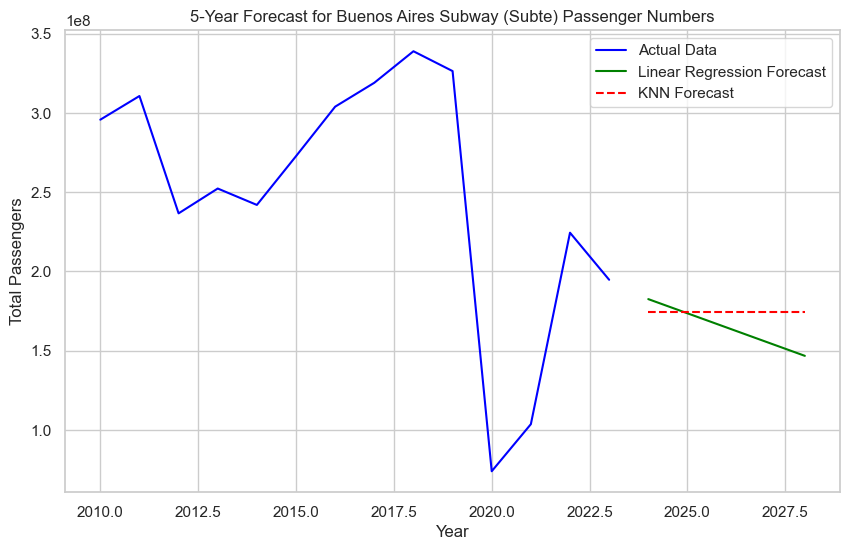

In [68]:

# Creating a forecast for the next 5 years (2024-2028)
forecast_years_subte = np.array([[year] for year in range(2024, 2029)])  # Forecasting for 2024 to 2028

# Predictions using Linear Regression and KNN
lin_reg_forecast_subte = lin_reg_subte.predict(forecast_years_subte)
knn_forecast_subte = knn_subte.predict(forecast_years_subte)

# Plotting the forecast results
plt.figure(figsize=(10, 6))

# Plotting the actual data as a line
plt.plot(X, y, color='blue', label='Actual Data', linestyle='-')

# Plotting Linear Regression Forecast
plt.plot(forecast_years_subte, lin_reg_forecast_subte, color='green', label='Linear Regression Forecast')

# Plotting KNN Forecast
plt.plot(forecast_years_subte, knn_forecast_subte, color='red', linestyle='--', label='KNN Forecast')

plt.title('5-Year Forecast for Buenos Aires Subway (Subte) Passenger Numbers')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.legend()
plt.grid(True)
plt.show()

### Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score

# Number of portion for cross-validation
n_folds = 5

# Cross-validation for Linear Regression
mse_scores_lin_reg = cross_val_score(lin_reg_subte, X, y, scoring='neg_mean_squared_error', cv=n_folds)
mse_scores_lin_reg = -mse_scores_lin_reg  # Convert to positive values

# Cross-validation for KNN
mse_scores_knn = cross_val_score(knn_subte, X, y, scoring='neg_mean_squared_error', cv=n_folds)
mse_scores_knn = -mse_scores_knn  # Convert to positive values

# Average MSE across the folds for both models
avg_mse_lin_reg = np.mean(mse_scores_lin_reg)
avg_mse_knn = np.mean(mse_scores_knn)

avg_mse_lin_reg, avg_mse_knn, mse_scores_lin_reg, mse_scores_knn

(6704600871399762.0,
 6750398604565827.0,
 array([2.57489633e+15, 9.33951610e+14, 9.82442502e+15, 1.94834042e+16,
        7.06327171e+14]),
 array([1.66416259e+15, 9.20359824e+14, 5.64799936e+15, 2.35694184e+16,
        1.95005289e+15]))

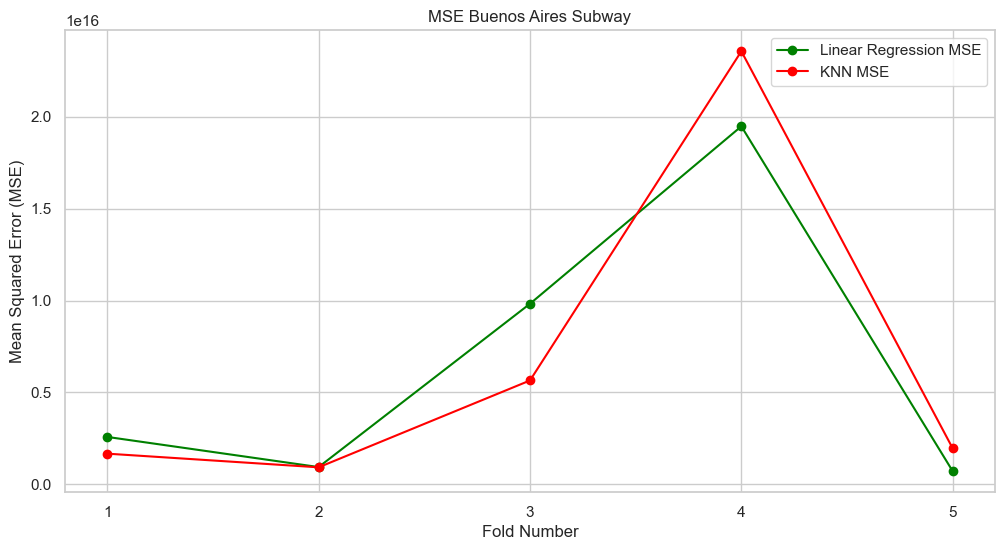

In [108]:
#Plot Buenos Aires Subway cross Validation
plt.figure(figsize=(12, 6))

# X-axis labels for the number of folds
folds = range(1, n_folds + 1)

# Plotting MSE for Linear Regression
plt.plot(folds, mse_scores_lin_reg, marker='o', color='green', label='Linear Regression MSE')

# Plotting MSE for KNN
plt.plot(folds, mse_scores_knn, marker='o', color='red', label='KNN MSE')

plt.title('MSE Buenos Aires Subway')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

#### Comparing the MSE of both data sets 

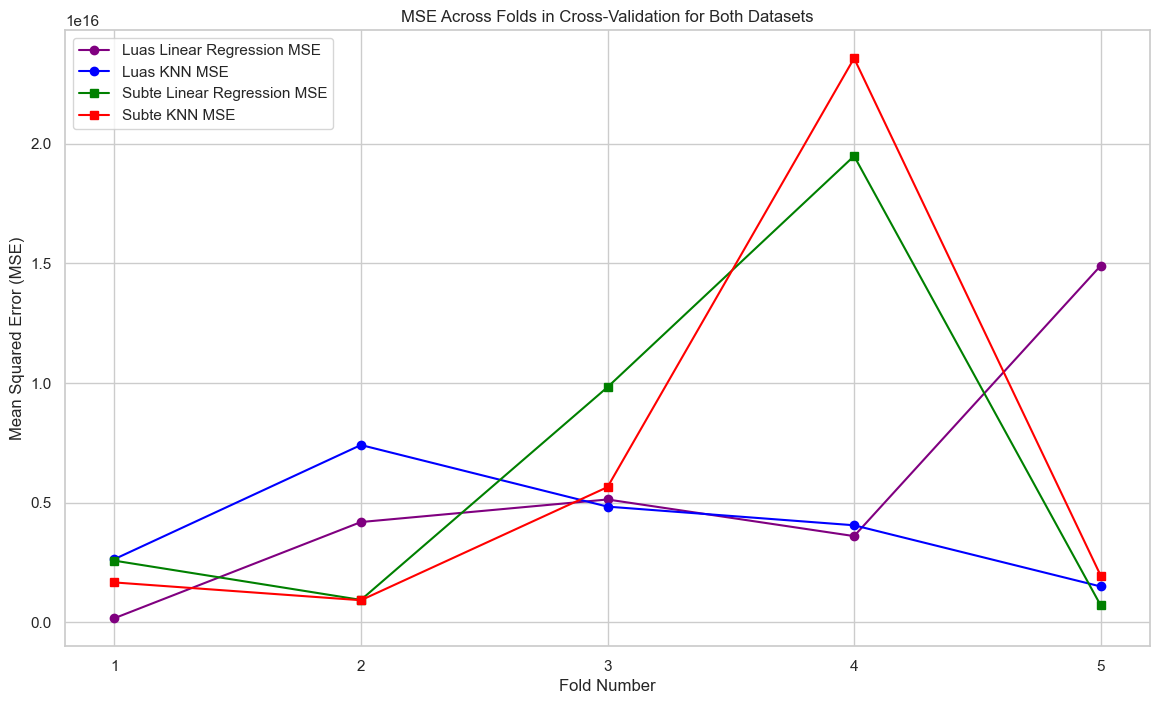

In [114]:
#Luas Dublin and Subway Buenos Aires

# Plotting the MSE for each fold in cross validation for both datasets and models
plt.figure(figsize=(14, 8))

# X-axis labels for the number of folds
folds = range(1, n_folds + 1)

# Plotting MSE for Linear Regression - Dublin Luas
plt.plot(folds, mse_scores_lin_reg_luas, marker='o', color='purple', label='Luas Linear Regression MSE')

# Plotting MSE for KNN - Dublin Luas
plt.plot(folds, mse_scores_knn_luas, marker='o', color='blue', label='Luas KNN MSE')

# Plotting MSE for Linear Regression - Buenos Aires Subte
plt.plot(folds, mse_scores_lin_reg, marker='s', color='green', label='Subte Linear Regression MSE')

# Plotting MSE for KNN - Buenos Aires Subte
plt.plot(folds, mse_scores_knn, marker='s', color='red', label='Subte KNN MSE')

plt.title('MSE Across Folds in Cross-Validation for Both Datasets')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# Convert 'Year' and 'Month' to a datetime object
df_SubteBA2['Date'] = pd.to_datetime(df_SubteBA2['Year'].astype(str) + ' ' + df_SubteBA2['Month'])
df_SubteBA2 = df_SubteBA2.sort_values(by='Date')

In [135]:
import plotly.express as px

fig_total_ridership = px.line(df_SubteBA2, x='Date', y='Total', title='Total Subway Ridership Over Time')

In [136]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Buenos Aires Subway Ridership Dashboard'),
    html.Div(children='An interactive dashboard showcasing subway ridership trends.'),
    dcc.Graph(id='total-ridership-graph', figure=fig_total_ridership),
    # Additional components can be added here
])

if __name__ == '__main__':
    app.run_server(debug=True)